# Dendrogram and clustering 3d

In [1]:
%load_ext nb_black
%load_ext pycodestyle_magic
%pycodestyle_on

<IPython.core.display.Javascript object>

In [2]:
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv("/home/wojciech/Perfect-Plots__GIP/USArrests.csv")

<IPython.core.display.Javascript object>

## USArrests
Source of data: https://www.kaggle.com/deepakg/usarrests

In [3]:
df.rename(columns={"Unnamed: 0": "State"}, inplace=True)
df.head(4)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


<IPython.core.display.Javascript object>

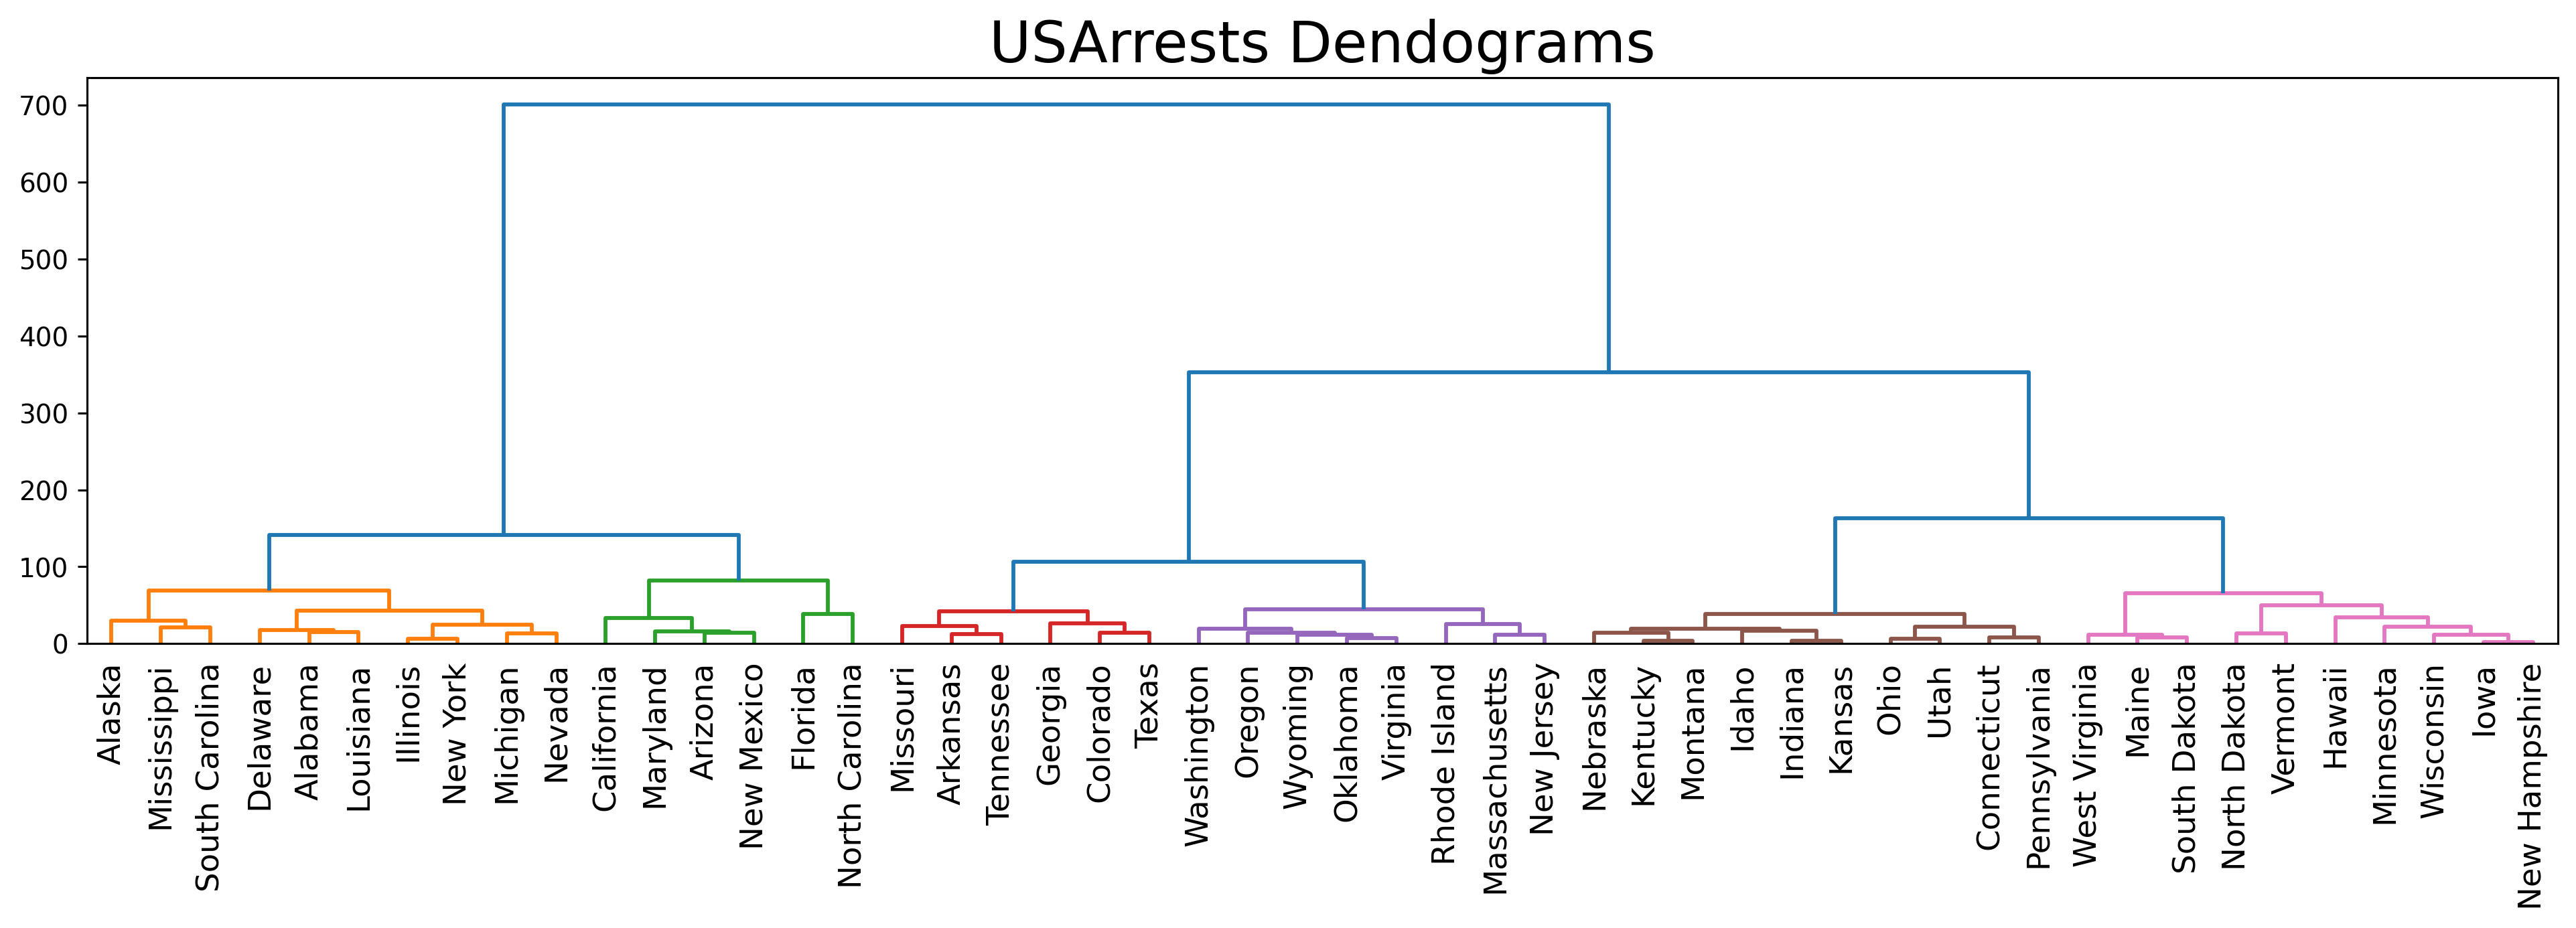

<IPython.core.display.Javascript object>

In [4]:
# Plot
plt.figure(figsize=(17, 4), dpi=280)
plt.title("USArrests Dendograms", fontsize=22)
dend = shc.dendrogram(
    shc.linkage(df[["Murder", "Assault", "UrbanPop", "Rape"]], method="ward"),
    labels=df.State.values,
    color_threshold=100,
)
plt.xticks(fontsize=12)
plt.show()

## Earning and expenses
Source of example: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [5]:
df3 = pd.read_csv(
    "/home/wojciech/Perfect-Plots__GIP/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv"
)
df3.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<IPython.core.display.Javascript object>

2:80: E501 line too long (110 > 79 characters)


We have a table that shows gender, age, annual income and expenditure. We take a vector of two coordinates from the DataFrame table: annual income in k $ - a tendency to spend on a scale of 1 to 100.

In [6]:
data = df3.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<IPython.core.display.Javascript object>

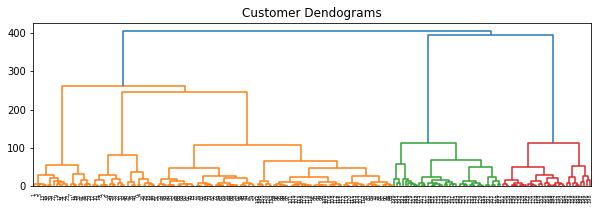

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(10, 3))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method="ward"))

The dendrogram showed that there are 5 clusters (5 branches) of the bank's clients. We create a clustering matrix. Since we had five clusters, we have five labels at the output, i.e. 0 to 4.

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<IPython.core.display.Javascript object>

3:80: E501 line too long (85 > 79 characters)


Text(0, 0.5, 'Spending')

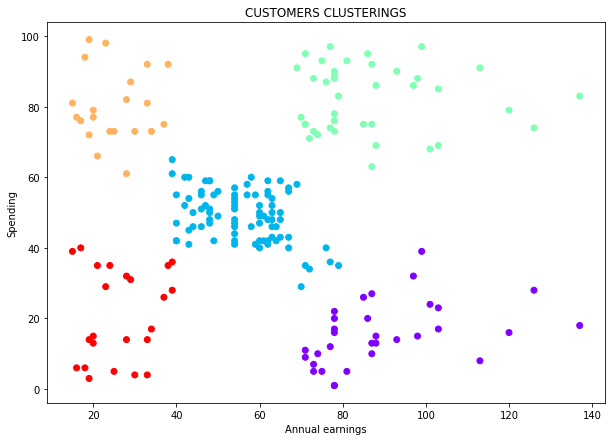

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap="rainbow")
plt.title("CUSTOMERS CLUSTERINGS")
plt.xlabel("Annual earnings")
plt.ylabel("Spending")

Purple cluster - (in the lower right corner) a cluster of clients with high earnings but low expenses. Customers in the middle (blue data points) are those with average income and average salary. The largest number of customers belongs to this category.

## Clinical tests

Source of data: https://www.kaggle.com/saurabh00007/diabetescsv

In [10]:
df3 = pd.read_csv("/home/wojciech/Perfect-Plots__GIP/diabetes.csv")
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<IPython.core.display.Javascript object>

In [11]:
PKP = df3[["Age", "SkinThickness", "BMI"]]

<IPython.core.display.Javascript object>

In [12]:
PKP.head()

,Age,SkinThickness,BMI
0,50,35,33.6
1,31,29,26.6
2,32,0,23.3
3,21,23,28.1
4,33,35,43.1


<IPython.core.display.Javascript object>

### The dendroid chart will tell you how many clusters you want

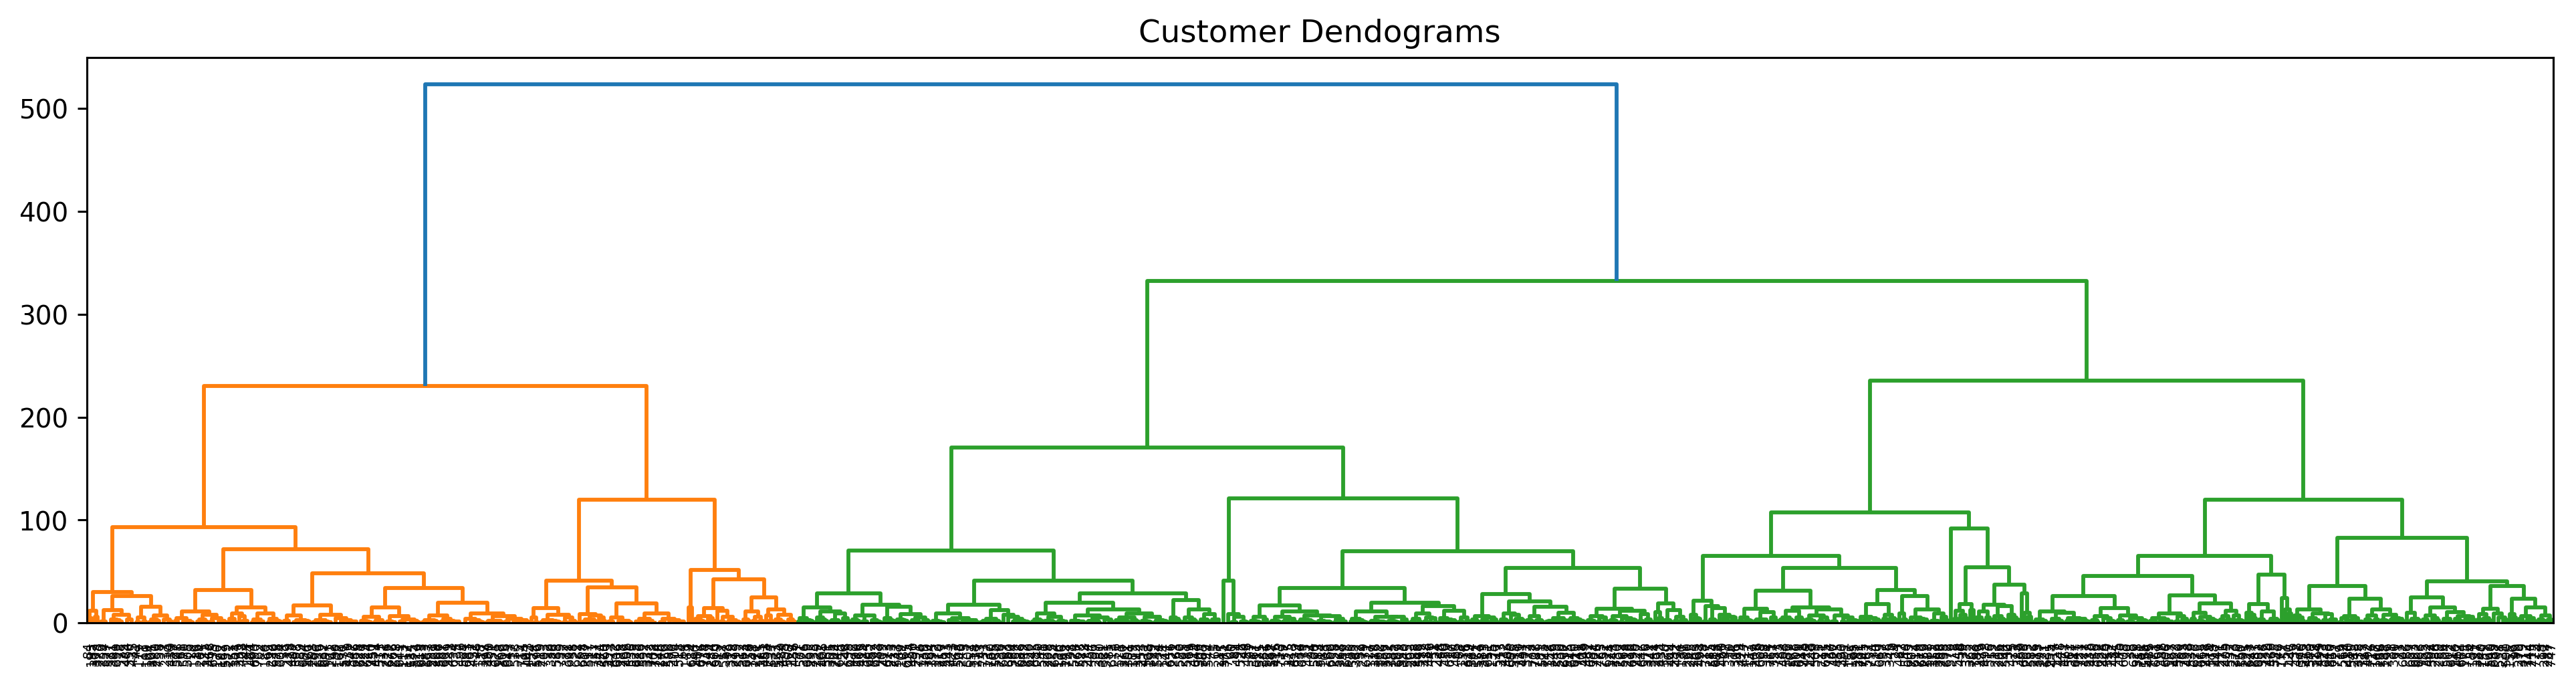

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(17, 4), dpi=280)
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(PKP, method="ward"))

## It seems 5 clusters

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PKP["Age"], PKP["SkinThickness"], PKP["BMI"], color="black", marker="o")

ax.set_title("Clusters", fontsize=30, alpha=0.6)
ax.set_xlabel("Age", fontsize=20, alpha=0.6)
ax.set_ylabel("SkinThickness", fontsize=20, alpha=0.6)
ax.set_zlabel("BMI", fontsize=20, alpha=0.6)

NameError: name 'Axes3D' is not defined

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

3:71: E231 missing whitespace after ','
3:80: E501 line too long (82 > 79 characters)
5:35: E251 unexpected spaces around keyword / parameter equals
6:31: E251 unexpected spaces around keyword / parameter equals
7:41: E251 unexpected spaces around keyword / parameter equals
8:31: E251 unexpected spaces around keyword / parameter equals


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
KF = cluster.fit_predict(PKP)
KF

In [ ]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(PKP)
# Predicting the clusters
labels = kmeans.predict(PKP)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [ ]:
C


In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PKP["Age"], PKP["SkinThickness"], PKP["BMI"], c=KF)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker=".", c="red", s=1000)

ax.set_title("Clusters", fontsize=30, alpha=0.6)
ax.set_xlabel("Age", fontsize=20, alpha=0.6)
ax.set_ylabel("SkinThickness", fontsize=20, alpha=0.6)
ax.set_zlabel("BMI", fontsize=20, alpha=0.6)